<a href="https://colab.research.google.com/github/Basy-Duke/Basy-Duke/blob/main/A_Comprehensive_Dataset_for_Predicting_Diabetes_with_Medical_%26_Demographic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Load and Understand the Data

In [25]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [26]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [27]:
df.shape

(100000, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [29]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [30]:

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#Data Cleaning

Check for missing values

In [31]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


This dataset doesn't have NaN, but some columns may have zero as a placeholder for missing values.

#Replace zeroes with NaN for relevant features:

In [32]:
# Based on the dataset, these columns don't have 0s representing missing values
# and the columns listed in the original code do not exist.
# If there were 0s representing missing values in relevant columns like bmi,
# HbA1c_level, or blood_glucose_level, you would list them here.
# Example (if needed):
# columns_with_zeroes = ['bmi', 'HbA1c_level', 'blood_glucose_level']
# df[columns_with_zeroes] = df[columns_with_zeroes].replace(0, np.nan)
# df.fillna(df.median(numeric_only=True), inplace=True)

# Since there are no 0s representing missing values in the relevant columns,
# this cell is not needed for this dataset.

In [33]:
import numpy as np

In [34]:
import pandas as pd
import numpy as np

# Load the dataset (ensure df is defined)
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

# Based on the dataset description and previous checks, 0 in 'hypertension',
# 'heart_disease', and 'diabetes' are not missing values but represent the
# absence of the condition. Therefore, we should not replace them with NaN.

# If there were other columns where 0 represented a missing value, you would
# list them here and perform the replacement and imputation.
# Example (if needed):
# cols_with_zero_as_missing = ['some_other_column']
# df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)
# df.fillna(df.median(numeric_only=True), inplace=True)

# For this dataset, the following line is not needed as 0 is not a missing value
# cols_with_zero = ['hypertension', 'heart_disease', 'diabetes']
# df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# We can check for actual missing values (NaNs)
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [35]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#Impute missing values (e.g., with median):

In [36]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [37]:
median_hypertension = df['hypertension'].median()
median_heart_disease = df['heart_disease'].median()
median_diabetes = df['diabetes'].median()
median_hypertension, median_heart_disease, median_diabetes

(0.0, 0.0, 0.0)

In [38]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#Exploratory Data Analysis (EDA)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

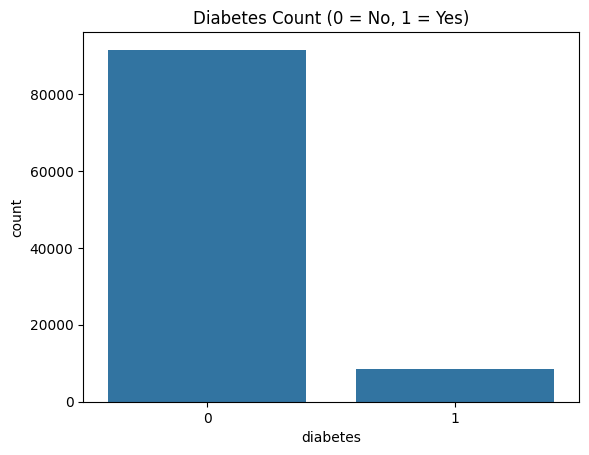

In [40]:
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Count (0 = No, 1 = Yes)")
plt.show()

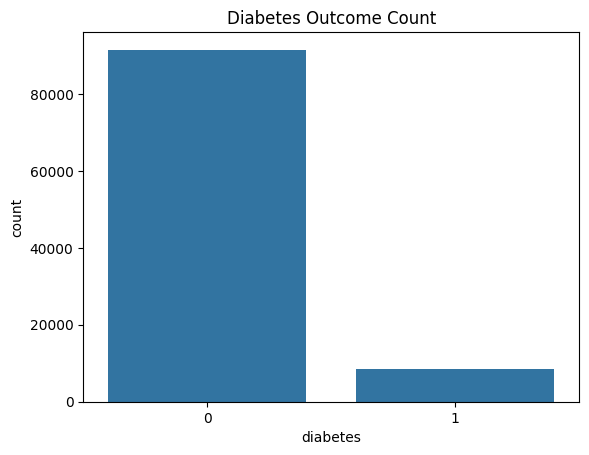

In [41]:
# Class balance
sns.countplot(data=df, x='diabetes')
plt.title('Diabetes Outcome Count')
plt.show()

# Correlation Matrix

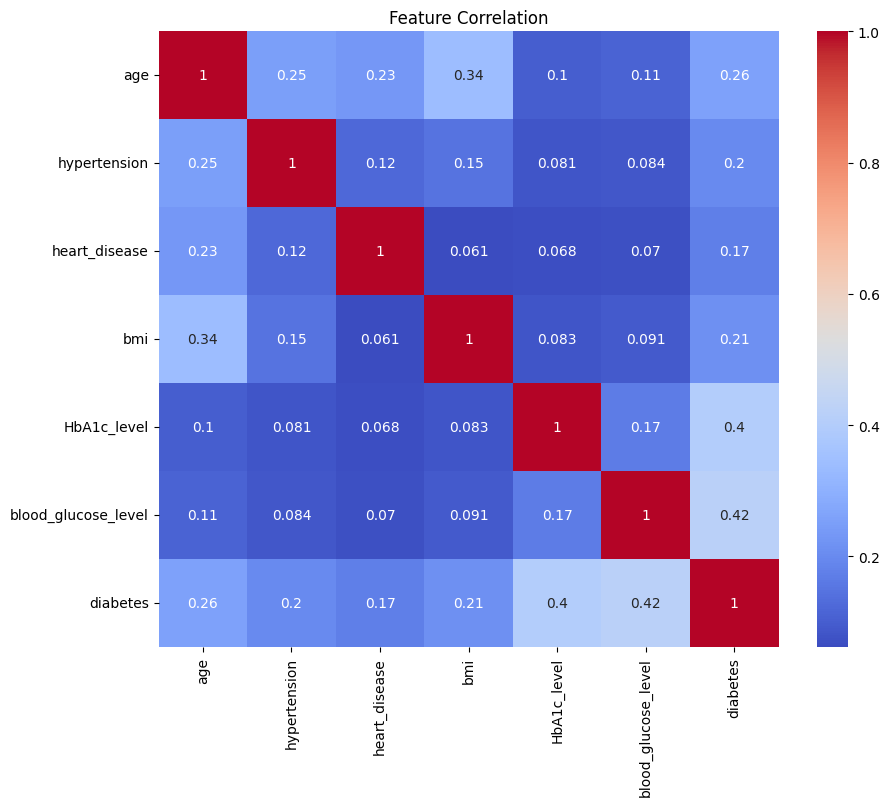

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

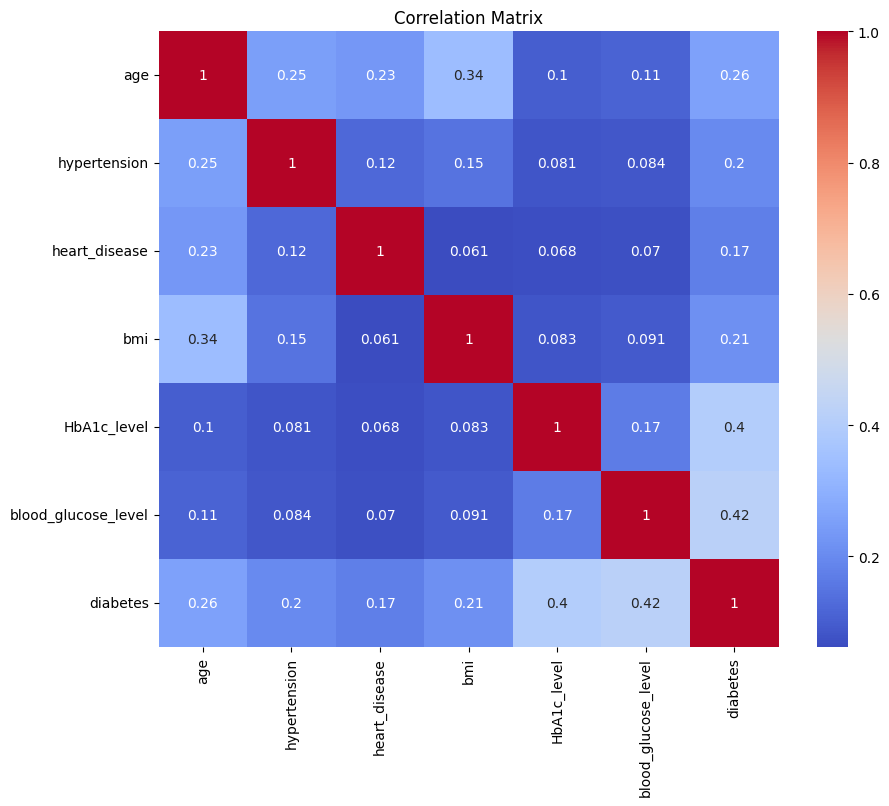

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Boxplot to detect outliers

In [44]:
# Boxplot to detect outliers

 # Feature Distributions

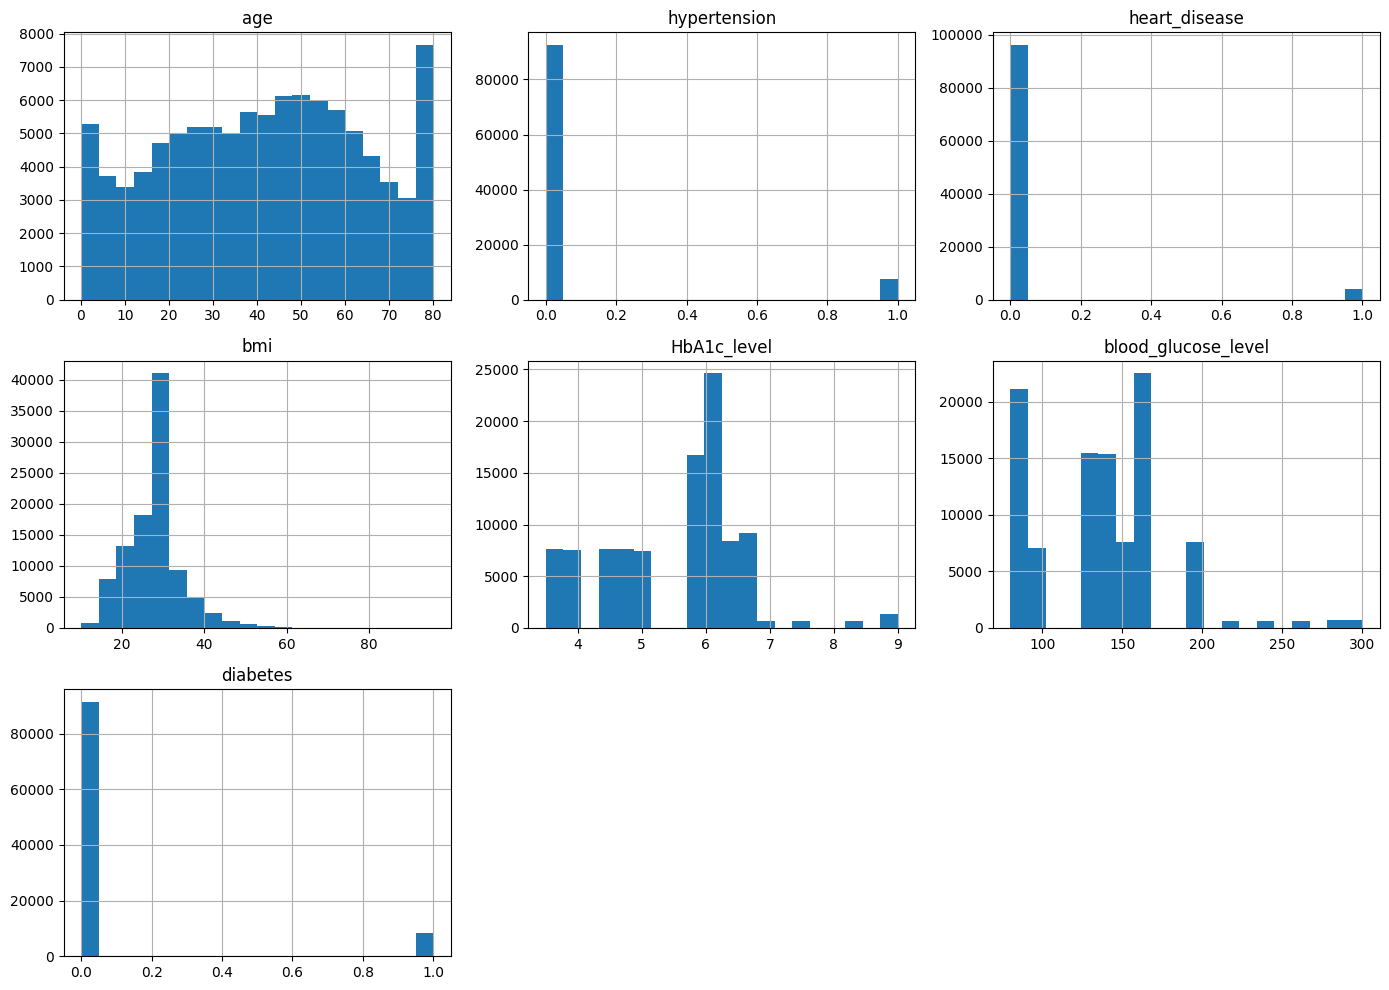

In [45]:
df.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

# Feature Scaling

In [46]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Select categorical columns for one-hot encoding
categorical_cols = ['gender', 'smoking_history']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Training and Evaluation

We'll train and evaluate multiple models:

#  1. Logistic Regression

In [48]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9605
[[18122   178]
 [  612  1088]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [49]:
# Reload the original dataset to fix the issue with the target variable
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

# Data Preprocessing (Revisited)

In [50]:
# Select features (X) and target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Select categorical columns for one-hot encoding
categorical_cols = ['gender', 'smoking_history']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (Revisited)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Training and Evaluation

# 1. Logistic Regression

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9605
[[18122   178]
 [  612  1088]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



#  2. Decision Tree

In [53]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#  3. Random Forest

In [54]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 4. K-Nearest Neighbors

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 5. Support Vector Machine

In [56]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Compare Model Performances

In [57]:
models = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'SVM': accuracy_score(y_test, y_pred_svc)
}

for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

Logistic Regression: 0.9605
Decision Tree: 0.9514
Random Forest: 0.9704
K-Nearest Neighbors: 0.9604
SVM: 0.9636


# Hyperparameter Tuning (Optional but Recommended)

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Accuracy: 0.9717874999999999


In [59]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')